<a href="https://colab.research.google.com/github/anilvce/a/blob/master/Exp_7_Solve_LinearEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### solve system of linear equations:
x+2y = 5

3x+4y = 7

Ax = b

x = Ainv.dot(b)

Root finding refers to the general problem of searching for a solution of an equation $F(x)=0$ for some function $F(x)$. This is a very general problem and it comes up a lot in mathematics! For example, if we want to optimize a function $f(x)$ then we need to find critical points and therefore solve the equation  $f'(x)=0$


solve system of linear equations:
x+2y = 5

3x+4y = 7

Ax = b

x = Ainv.dot(b)

In [ ]:
#x+2y = 5 3x+4y = 7 Ax = b
#x = Ainv.dot(b)
import numpy as np
from scipy import linalg

A= np.array([[1,2], [3,4]])
b= np.array([5,7])
x= linalg.inv(A).dot(b)
print(x)
print(A.dot(x))

[-3.  4.]
[5. 7.]


In [ ]:
linalg.solve(A, b)

array([-3.,  4.])

In [ ]:
m = 4; n=2
A = np.random.randint(100, size=(m,n))
b = np.random.randint(100, size=(m,1))
print("A=\n{}".format(A))
print("b=\n{}".format(b))

A=
[[ 8 42]
 [41 45]
 [87 45]
 [93  4]]
b=
[[34]
 [23]
 [37]
 [64]]


In [ ]:
#linalg.solve(A, b) - does not work
Ainv = linalg.pinv(A)
x = Ainv.dot(b)
print("x=",x)
print(A.dot(x) - b)

x= [[0.51192628]
 [0.18402415]]
[[-22.17557527]
 [  6.27006443]
 [ 15.81867332]
 [-15.65475934]]


linalg.lstsq(a, b)


Return the least-squares solution to a linear matrix equation.

Computes the vector x that approximately solves the equation a @ x = b. The equation may be under-, well-, or over-determined (i.e., the number of linearly independent rows of a can be less than, equal to, or greater than its number of linearly independent columns). If a is square and of full rank, then x (but for round-off error) is the “exact” solution of the equation.

In [ ]:
#Minimizing |Ax-b|
x, res, rnk, s = linalg.lstsq(A, b)
print(x)
print(A.dot(x) - b)

[[0.51192628]
 [0.18402415]]
[[-22.17557527]
 [  6.27006443]
 [ 15.81867332]
 [-15.65475934]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x co-ordinates
x = np.arange(0, 9)

A = np.array([x, np.ones(9)])
print("x=",x)
print("A=",A)
# linearly generated sequence
y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]

# obtaining the parameters of regression line
print("A transpose is", A.T)
w = np.linalg.lstsq(A.T, y, rcond=None)[0]
print(w)

x= [0 1 2 3 4 5 6 7 8]
A= [[0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]
A transpose is [[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]
 [7. 1.]
 [8. 1.]]
[ 0.71666667 19.18888889]


[19.18888889 19.90555556 20.62222222 21.33888889 22.05555556 22.77222222
 23.48888889 24.20555556 24.92222222]


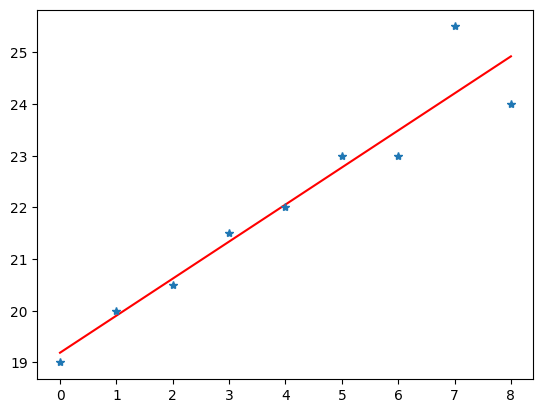

In [ ]:
print(A.T@w)
import matplotlib.pyplot as plt
plt.plot(x,A.T@w,'r-')
plt.plot(x,y,'*')
plt.show()

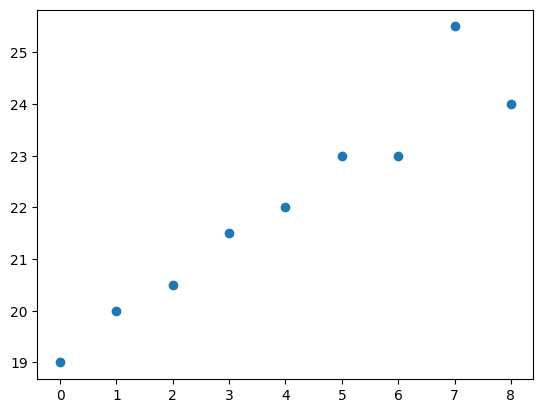

In [ ]:
plt.scatter(x,y)

Fit a line, y = mx + c, through some noisy data-points:

The simplest root finding algorithm is the bisection method. The algorithm applies to any continuous function $f(x)$
 on an interval $[a,b]$  where the value of the function
 changes sign from $a$ to $b$. The idea is simple: divide the interval in two, a solution must exist within one subinterval, select the subinterval where the sign of $f(x)$
 changes and repeat.

 We can rewrite the line equation as y = Ap, where A = [[x 1]] and p = [[m], [c]]. Now use lstsq to solve for p:

In [ ]:
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

In [ ]:
on=np.ones(4)
print(x,on)
A = np.vstack([x, np.ones(4)]).T
display(A)
m,c=np.linalg.lstsq(A,y)[0]
print("m=",m)
print("c=",c)

[0 1 2 3] [1. 1. 1. 1.]


array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

m= 0.9999999999999999
c= -0.9499999999999997


<ipython-input-14-5cfe87b58da3>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m,c=np.linalg.lstsq(A,y)[0]


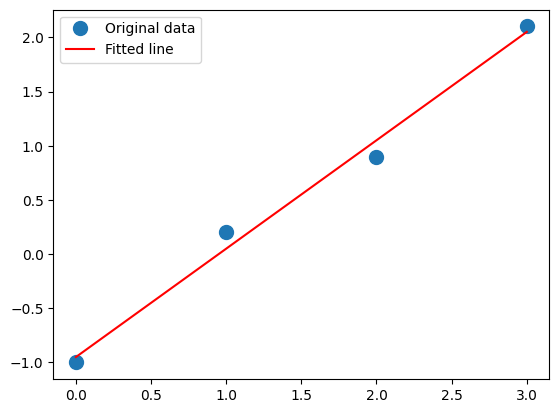

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

In [ ]:
def f(x):
    return (x**2 - 1)
from scipy import optimize
root1 = optimize.bisect(f, 0, 2)
root2 = optimize.bisect(f, -2, 0)
print(root1,root2)

1.0 -1.0


In [ ]:
def f(x):
    return (x**3 - 1)  # only one real root at x = 1
root = optimize.newton(f, 1.5)
root




1.0000000000000016

In [ ]:
root = optimize.newton(f, 1.5, fprime2=lambda x: 6 * x)
root


1.0000000000000016

In [ ]:
root = optimize.newton(f, 1.5, fprime=lambda x: 3 * x**2)
root


1.0

In [ ]:
root = optimize.newton(f, 1.5, fprime=lambda x: 3 * x**2,
                       fprime2=lambda x: 6 * x)
root

1.0

In [ ]:
def fun(x):
    return [x[0]  + 0.5 * (x[0] - x[1])**3 - 1.0,
            0.5 * (x[1] - x[0])**3 + x[1]]
sol = optimize.root(fun, [0, 0])
sol.x

array([0.8411639, 0.1588361])

In [ ]:
solution=optimize.root(f,1.5)
solution.x

array([1.])

#Exercises
https://www.atozmath.com/example/CONM/LeastSquare.aspx?he=h (first three problems)




Find the roots of the equation using newton, bisect (with and without using formula)

 1. $f(x) = 2x^3-2x-5$
 2. $f(x) = x^3-x-1$
 3. $f(x) = x^3+2x^2+x-1$
 4. $f(x) = x^3-2x-5$
 5. $f(x) = x^3-x+1$


1. solve the following equation cos(x)=x**3 by using builtin function and without using function
2. solve x**2=2 by using builtin function and without using function
3. find the square and cube root using builtin function and without using function
4. Find the root of $x^2+y=5$ and $y^2+x=10$

